# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Create a DataFrame to hold the cities data
cities_df=pd.DataFrame(cities)

cities_df["Country"]=""
cities_df["Cloudiness"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""
cities_df=cities_df.rename(columns={0:"CityName"})
cities_df['CityName'] = (cities_df['CityName'].str.title())

unique = len(cities_df['CityName'].unique())
print(unique)
cities_df.head()

617


,CityName,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaqortoq,,,,,,,,
1,Taltal,,,,,,,,
2,Saint-Philippe,,,,,,,,
3,Mataura,,,,,,,,
4,Yellowknife,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weatherdata = []
notfound = []
record = 0
set = 1
print("Beginning Data Retrieval")
print("-"*30)

# Build query URL, get weather data for each city:
for index, row in cities_df.iterrows():
    city = row['CityName']
    query_url = f"{url}appid={api_key}&units={units}&q={city}"

    #store request response
    weather_responses = requests.get(query_url).json()
    
    #increment for data log output
    if record >= 50 and record % 50 == 0:
        record = 0
        set += 1
    
    #sleep for 1 second to limit calls to 60 per minute
    time.sleep(1)
    
    #append each weather response to weatherdata list
    weatherdata.append(weather_responses)

        
    try:
        cities_df.loc[index, 'Cloudiness'] = weatherdata[index]['clouds']['all']
        cities_df.loc[index, 'Country'] = weatherdata[index]['sys']['country']
        cities_df.loc[index, 'Date'] = weatherdata[index]['dt']
        cities_df.loc[index, 'Humidity'] = weatherdata[index]['main']['humidity']
        cities_df.loc[index, 'Lat'] = weatherdata[index]['coord']['lat']
        cities_df.loc[index, 'Lng'] = weatherdata[index]['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weatherdata[index]['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weatherdata[index]['wind']['speed']
        record += 1
        print(f"Processing Record {record} of Set {set} | {city}")
        
    except (KeyError, IndexError):
        notfound.append(index)
        print("City not found. Skipping...")

print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Qaqortoq
Processing Record 2 of Set 1 | Taltal
Processing Record 3 of Set 1 | Saint-Philippe
Processing Record 4 of Set 1 | Mataura
Processing Record 5 of Set 1 | Yellowknife
Processing Record 6 of Set 1 | Puerto Ayora
City not found. Skipping...
Processing Record 7 of Set 1 | Mar Del Plata
Processing Record 8 of Set 1 | Qaanaaq
City not found. Skipping...
Processing Record 9 of Set 1 | Iglesias
Processing Record 10 of Set 1 | Carnarvon
Processing Record 11 of Set 1 | Ambon
Processing Record 12 of Set 1 | Ketchikan
Processing Record 13 of Set 1 | Rikitea
Processing Record 14 of Set 1 | San Quintin
Processing Record 15 of Set 1 | Provideniya
Processing Record 16 of Set 1 | East London
Processing Record 17 of Set 1 | Punta Arenas
Processing Record 18 of Set 1 | Arraial Do Cabo
Processing Record 19 of Set 1 | Panguna
Processing Record 20 of Set 1 | Cherskiy
Processing Record 21 of Set 1 | Mehamn
Process

Processing Record 31 of Set 4 | Bowen
City not found. Skipping...
Processing Record 32 of Set 4 | Yulara
Processing Record 33 of Set 4 | Tautira
City not found. Skipping...
Processing Record 34 of Set 4 | Chesma
Processing Record 35 of Set 4 | Alugan
Processing Record 36 of Set 4 | Alofi
Processing Record 37 of Set 4 | Pangnirtung
Processing Record 38 of Set 4 | Beitbridge
Processing Record 39 of Set 4 | Lichinga
Processing Record 40 of Set 4 | Itarema
Processing Record 41 of Set 4 | Faanui
Processing Record 42 of Set 4 | Luderitz
Processing Record 43 of Set 4 | Moses Lake
City not found. Skipping...
Processing Record 44 of Set 4 | Aswan
Processing Record 45 of Set 4 | Muisne
City not found. Skipping...
Processing Record 46 of Set 4 | Chuy
Processing Record 47 of Set 4 | Punta Alta
Processing Record 48 of Set 4 | Lagoa
Processing Record 49 of Set 4 | Blackfoot
Processing Record 50 of Set 4 | Panjab
Processing Record 1 of Set 5 | Ulladulla
City not found. Skipping...
Processing Record 2

City not found. Skipping...
Processing Record 18 of Set 8 | Mattru
Processing Record 19 of Set 8 | Yeniseysk
Processing Record 20 of Set 8 | College
Processing Record 21 of Set 8 | Chadiza
Processing Record 22 of Set 8 | Troitsko-Pechorsk
Processing Record 23 of Set 8 | Butembo
Processing Record 24 of Set 8 | Inhambane
Processing Record 25 of Set 8 | Ballina
City not found. Skipping...
Processing Record 26 of Set 8 | Madison
Processing Record 27 of Set 8 | Valdivia
City not found. Skipping...
Processing Record 28 of Set 8 | Gwadar
Processing Record 29 of Set 8 | Marawi
Processing Record 30 of Set 8 | Lakota
Processing Record 31 of Set 8 | Kirakira
Processing Record 32 of Set 8 | Dwarka
Processing Record 33 of Set 8 | Tevaitoa
Processing Record 34 of Set 8 | Bahia Honda
Processing Record 35 of Set 8 | Jalu
Processing Record 36 of Set 8 | Narsaq
Processing Record 37 of Set 8 | Hervey Bay
Processing Record 38 of Set 8 | Isangel
Processing Record 39 of Set 8 | Senneterre
City not found. Sk

In [9]:
#drop rows with incomplete data, print df
cities_df=cities_df.drop(notfound)

#verify that end of file data matches
cities_df.tail()

,CityName,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
610,Thinadhoo,MV,98,1570811635,77,0.53,72.93,82.4,11.98
611,Concarneau,FR,90,1570811636,93,47.88,-3.92,64,13.87
612,Kununurra,AU,0,1570811637,59,-15.77,128.74,64.4,2.71
613,Saint-Marc-Des-Carrieres,CA,1,1570811639,38,46.68,-72.05,60.8,11.41
616,Pirgos,GR,20,1570811642,83,35.12,25.72,78.01,5.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_df.to_csv("Mandell2WeatherData.csv", index=False, header=True)

In [11]:
cities_df.count()

CityName      547
Country       547
Cloudiness    547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [12]:
cities_df.head(10)

,CityName,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaqortoq,GL,75,1570810898,80,60.72,-46.03,35.6,4.7
1,Taltal,CL,6,1570810900,73,-25.41,-70.49,57.88,5.33
2,Saint-Philippe,CA,1,1570810901,51,45.36,-73.48,63,14.99
3,Mataura,NZ,100,1570810902,96,-46.19,168.86,43,5.01
4,Yellowknife,CA,90,1570810903,86,62.45,-114.38,39,19.46
5,Puerto Ayora,EC,20,1570810904,60,-0.74,-90.35,75.2,20.8
7,Mar Del Plata,AR,13,1570810907,60,-46.43,-67.52,45.66,15.41
8,Qaanaaq,GL,100,1570810908,61,77.48,-69.36,26.44,8.34
10,Iglesias,ES,20,1570810910,29,42.3,-3.99,81,11.41
11,Carnarvon,ZA,33,1570810911,8,-30.97,22.13,82.54,12.65


In [13]:
from datetime import datetime
date=cities_df.iloc[1,3]

datetime=time.strftime("%D %H:%M", time.localtime(int(date)))
strdate=str(datetime)
#strdate

weatherdate=strdate.split(" ")[0]
weatherdate

'10/11/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

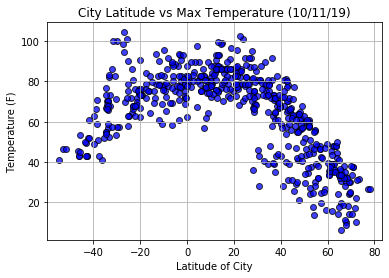

In [14]:
latitude=cities_df.loc[:, "Lat"]
temp=cities_df.loc[:, "Max Temp"]

plt.scatter(latitude, temp, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Max Temp"])-5, max(cities_df["Max Temp"]+5))

plt.title(f"City Latitude vs Max Temperature ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig('Temperature_vs_Lat')
plt.show()


#ax=cities_df.plot(kind='scatter', x='latitude', y='temp, color='blue', alpha=.75)


#### Latitude vs. Humidity Plot

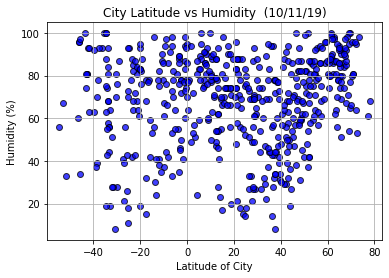

In [15]:
latitude=cities_df.loc[:, "Lat"]
humidity=cities_df.loc[:, "Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Humidity"])-5, max(cities_df["Humidity"]+5))

plt.title(f"City Latitude vs Humidity  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Humidity_vs_Lat')
plt.show()

#### Latitude vs. Cloudiness Plot

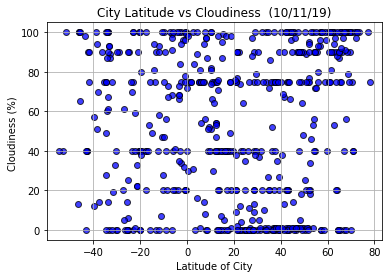

In [16]:
latitude=cities_df.loc[:, "Lat"]
clouds=cities_df.loc[:, "Cloudiness"]

plt.scatter(latitude, clouds, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Cloudiness"])-5, max(cities_df["Cloudiness"]+5))

plt.title(f"City Latitude vs Cloudiness  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Cloudiness (%) ")
plt.grid()
plt.savefig('Cloudiness_vs_Lat')
plt.show()

#### Latitude vs. Wind Speed Plot

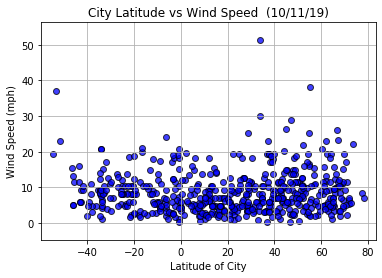

In [17]:
latitude=cities_df.loc[:, "Lat"]
windspeed=cities_df.loc[:, "Wind Speed"]

plt.scatter(latitude, windspeed, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Wind Speed"])-5, max(cities_df["Wind Speed"]+5))

plt.title(f"City Latitude vs Wind Speed  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('WindSpeed_vs_Lat')
plt.show()

In [ ]:
# ALL DONE !!!

# I actually enjoyed this one.  I felt like I knew what I was doing for the
# most part and could research and resolve the Date, Sleep, Try/Error, and
# Table building challenges.  The only problem I didn't resolove entirely on
# my own was the If loop using Modulus (%).  I had the general idea right,
# but I couldn't quite piece it together and asked for some help.